In [102]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [103]:
def normalize(numero, num_min, num_max):
    divisor = num_max - num_min
    norm_arr = (numero - num_min) / divisor
    return norm_arr

In [104]:
abalone = pd.read_csv('abalone.data.csv', header=None)

# Define os nomes das colunas
nomes_colunas = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone.columns = nomes_colunas

# Usar LabelEncoder para codificar a coluna 'Sex'
label_encoder = LabelEncoder()
abalone['Sex'] = label_encoder.fit_transform(abalone['Sex'])

abalone['SexCategory'] = abalone['Sex'].replace({'M': 1, 'F': 2, 'I': 0})

Target = abalone.pop('SexCategory')
abalone.drop(['Rings'], axis=1, inplace=True)  # Removendo a coluna "Rings"


In [105]:
# Converter para tensor e normalizar os dados
num_classes = 3
entrada = torch.FloatTensor(abalone.values)
saida1 = torch.LongTensor(Target.values)  # Usaremos LongTensor para as classes
saida = saida1

print(saida[:10],"\n", saida1[:10])

tensor([2, 2, 0, 2, 1, 1, 0, 0, 2, 0]) 
 tensor([2, 2, 0, 2, 1, 1, 0, 0, 2, 0])


In [106]:
# Normalizando
for coluna in range(entrada.shape[1]):
    entrada[:, coluna] = normalize(entrada[:, coluna], entrada[:, coluna].min(), entrada[:, coluna].max())

df = pd.DataFrame(dados)
print(df)


             0         1         2         3         4         5         6  \
0     0.513514  0.521008  0.084071  0.181335  0.150303  0.132324  0.147982   
1     0.371622  0.352941  0.079646  0.079157  0.066241  0.063199  0.068261   
2     0.614865  0.613445  0.119469  0.239065  0.171822  0.185648  0.207773   
3     0.493243  0.521008  0.110619  0.182044  0.144250  0.149440  0.152965   
4     0.344595  0.336134  0.070796  0.071897  0.059516  0.051350  0.053313   
...        ...       ...       ...       ...       ...       ...       ...   
4172  0.662162  0.663866  0.146018  0.313441  0.248151  0.314022  0.246637   
4173  0.695946  0.647059  0.119469  0.341420  0.294553  0.281764  0.258097   
4174  0.709459  0.705882  0.181416  0.415796  0.352724  0.377880  0.305431   
4175  0.743243  0.722689  0.132743  0.386931  0.356422  0.342989  0.293473   
4176  0.858108  0.840336  0.172566  0.689393  0.635172  0.495063  0.491779   

             7  
0     0.500000  
1     0.214286  
2     0.2857

In [107]:
# Embaralhar os dados
entrada, saida = shuffle(entrada, saida)

# Separar os dados em treinamento e teste
entrada_treinamento = entrada[0:4040, :]
saida_treinamento = saida[0:4040]
entrada_testes = entrada[4040:4176, :]
saida_testes = saida[4040:4176]

In [108]:
# Criar um modelo de Rede Neural com duas camadas escondidas
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(Net, self).__init__()
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size1)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size1, self.hidden_size2)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(self.hidden_size2, num_classes)

    def forward(self, x):
        hidden1 = self.fc1(x)
        relu1 = self.relu1(hidden1)
        hidden2 = self.fc2(relu1)
        relu2 = self.relu2(hidden2)
        output = self.fc3(relu2)
        return output

In [109]:
# Função para treinar e avaliar o modelo
def treinar_e_avaliar(hidden_size1, hidden_size2, lr, num_epochs, momentum):
    # Criar o modelo
    input_size = entrada_treinamento.size()[1]
    modelo = Net(input_size, hidden_size1, hidden_size2)

    # Configurações do modelo
    criterion = torch.nn.CrossEntropyLoss() #A função CrossEntropyLoss inclui a etapa de softmax internamente. Portanto, você não precisa aplicar a função softmax explicitamente no output do modelo. A função de perda (criterion) e o otimizador (optimizer) cuidam de todos esses cálculos para você.
    optimizer = torch.optim.SGD(modelo.parameters(), lr=lr, momentum=momentum)

    # Treinar o modelo
    modelo.train()
    errors = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        y_pred = modelo(entrada_treinamento)
        loss = criterion(y_pred, saida_treinamento)
        errors.append(loss.item())
        loss.backward()
        optimizer.step()

    # Avaliar o modelo
    modelo.eval()
    y_pred = modelo(entrada_testes)
    _, y_pred_classes = y_pred.max(dim=1)

    return errors, y_pred_classes.numpy(), saida_testes.numpy()


In [110]:
# Experimente diferentes valores de hidden_size, lr, num_epochs e momentum
hidden_sizes = [10, 30, 60, 90]
learning_rates = [0.1, 0.5, 0.9]
momentum_values = [0.1, 0.5, 0.8, 0.99]
num_epochs = 1000

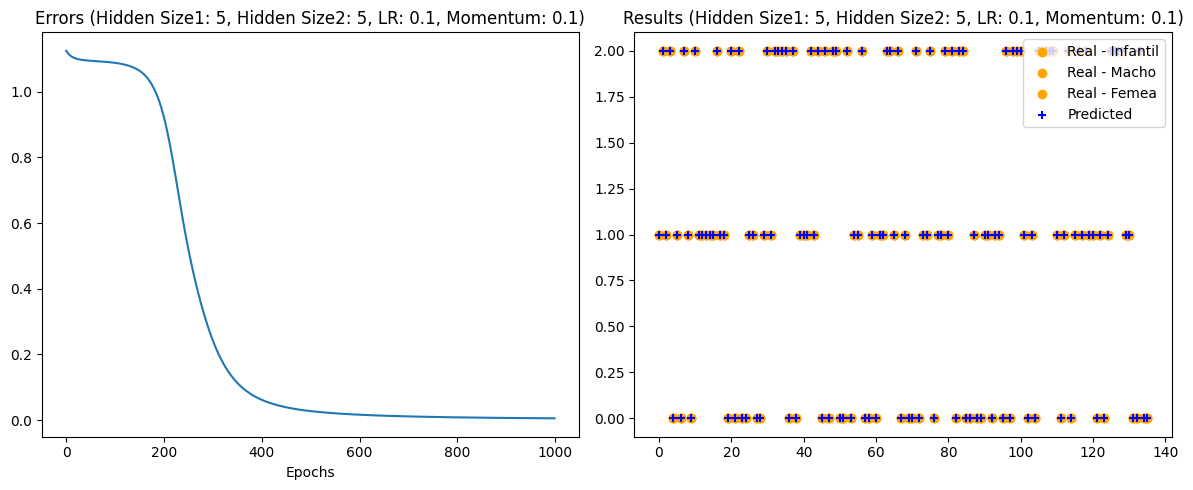

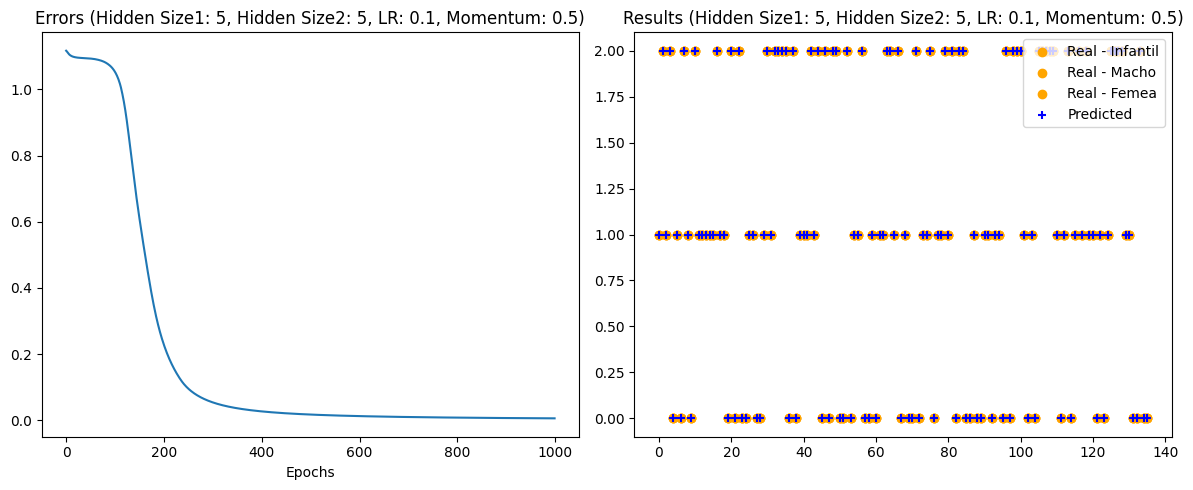

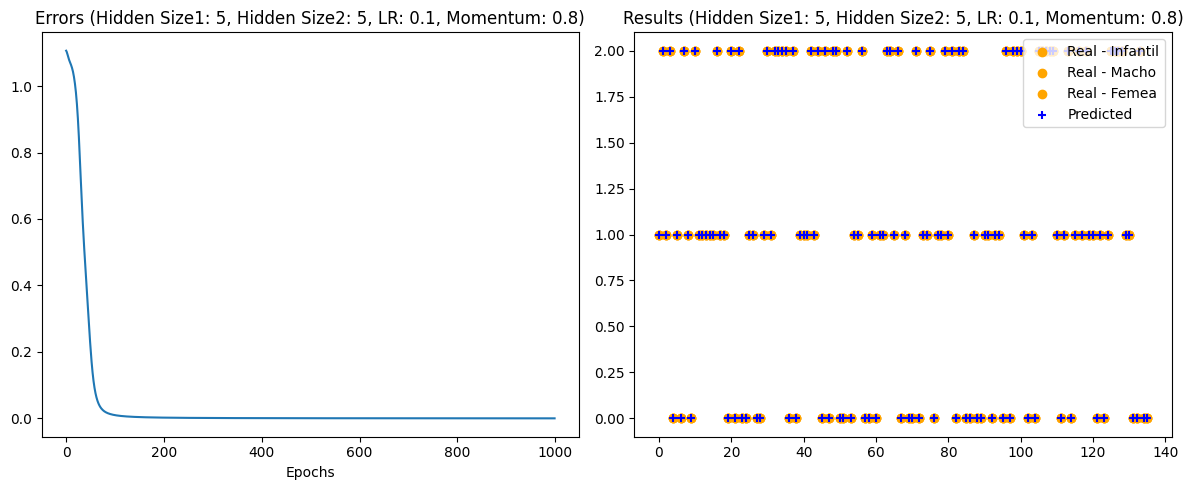

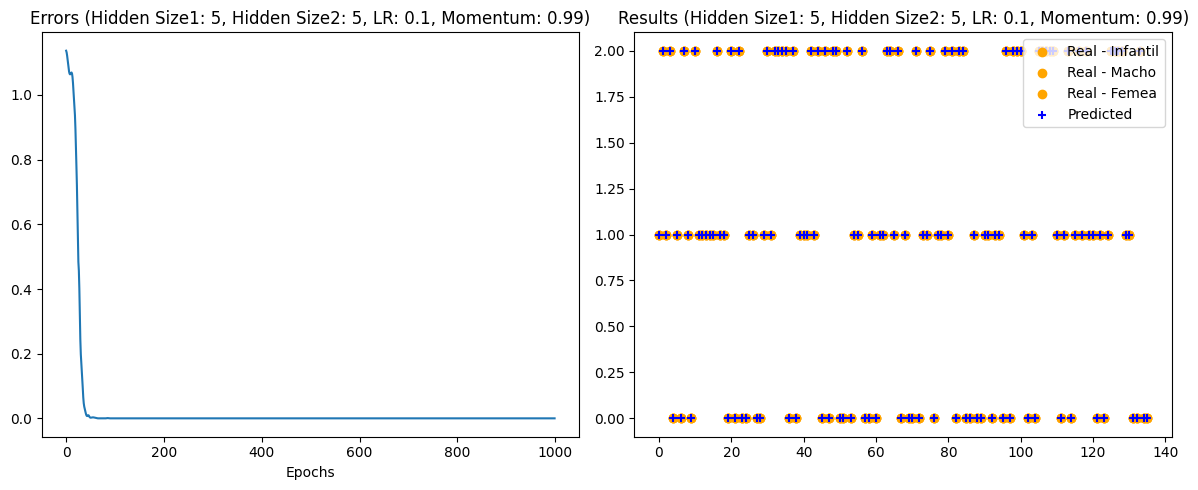

KeyboardInterrupt: ignored

In [111]:
# Executar experimentos e plotar gráficos de erro e resultados
for hidden_size1 in hidden_sizes1:
    for hidden_size2 in hidden_sizes2:
        for lr in learning_rates:
            for momentum in momentum_values:
                errors, y_pred, y_real = treinar_e_avaliar(
                    hidden_size1, hidden_size2, lr, num_epochs, momentum
                )

                plt.figure(figsize=(12, 5))

                plt.subplot(1, 2, 1)
                plt.title(
                    f"Errors (Hidden Size1: {hidden_size1}, Hidden Size2: {hidden_size2}, LR: {lr}, Momentum: {momentum})"
                )
                plt.plot(errors, "-")
                plt.xlabel("Epochs")

                plt.subplot(1, 2, 2)
                plt.title(
                    f"Results (Hidden Size1: {hidden_size1}, Hidden Size2: {hidden_size2}, LR: {lr}, Momentum: {momentum})"
                )

                # Plote as classes reais e previstas com cores apropriadas
                plt.scatter(range(len(y_real)), y_real, c='orange', marker='o', label='Real - Infantil')
                plt.scatter(range(len(y_real)), y_real, c='orange', marker='o', label='Real - Macho')
                plt.scatter(range(len(y_real)), y_real, c='orange', marker='o', label='Real - Femea')
                plt.scatter(range(len(y_pred)), y_pred, c='blue', marker='+', label='Predicted')

                # Defina a legenda no lado direito para representar as três classes
                plt.legend(loc="upper right")

                plt.tight_layout()
                plt.show()